> By Jiahui Tang

**Spec**:

* OS: AWS VM Ubuntu 18.04 
* Cluster: (x2.2large) * 2 instances
  * Latency: 
             rtt min/avg/max/mdev = 0.349/0.479/2.914/0.239 ms
             
  * Bandwidth: 
             Amazon says it’s 5 Gbps
* Compiler: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0

* More details below:


* Network Latency:
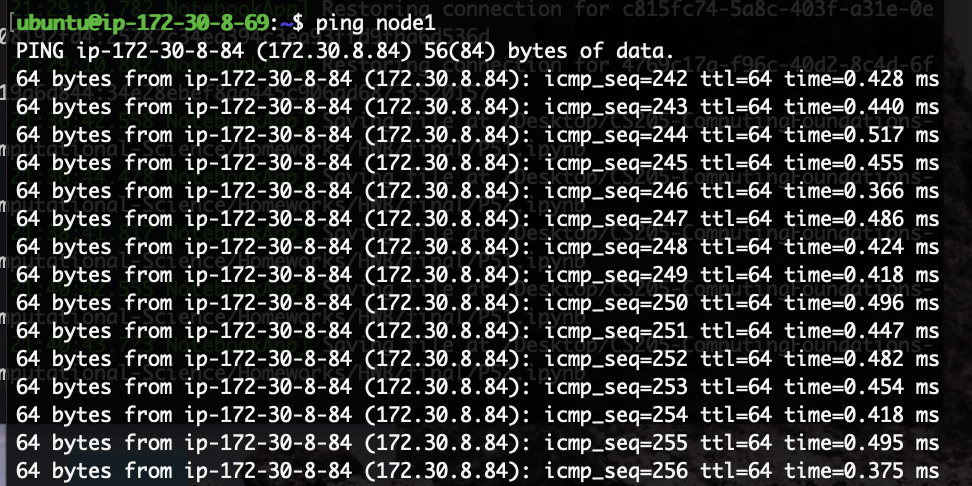
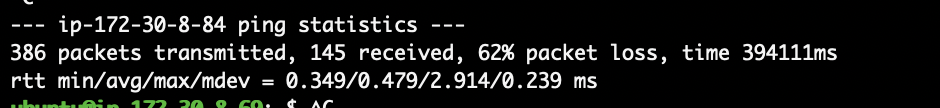

* Kernal Version:
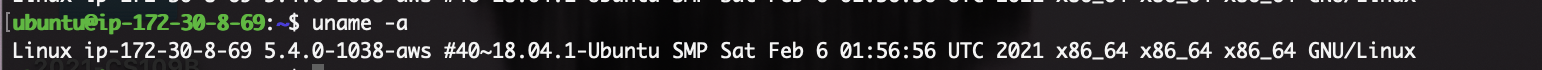


* MPI Info:
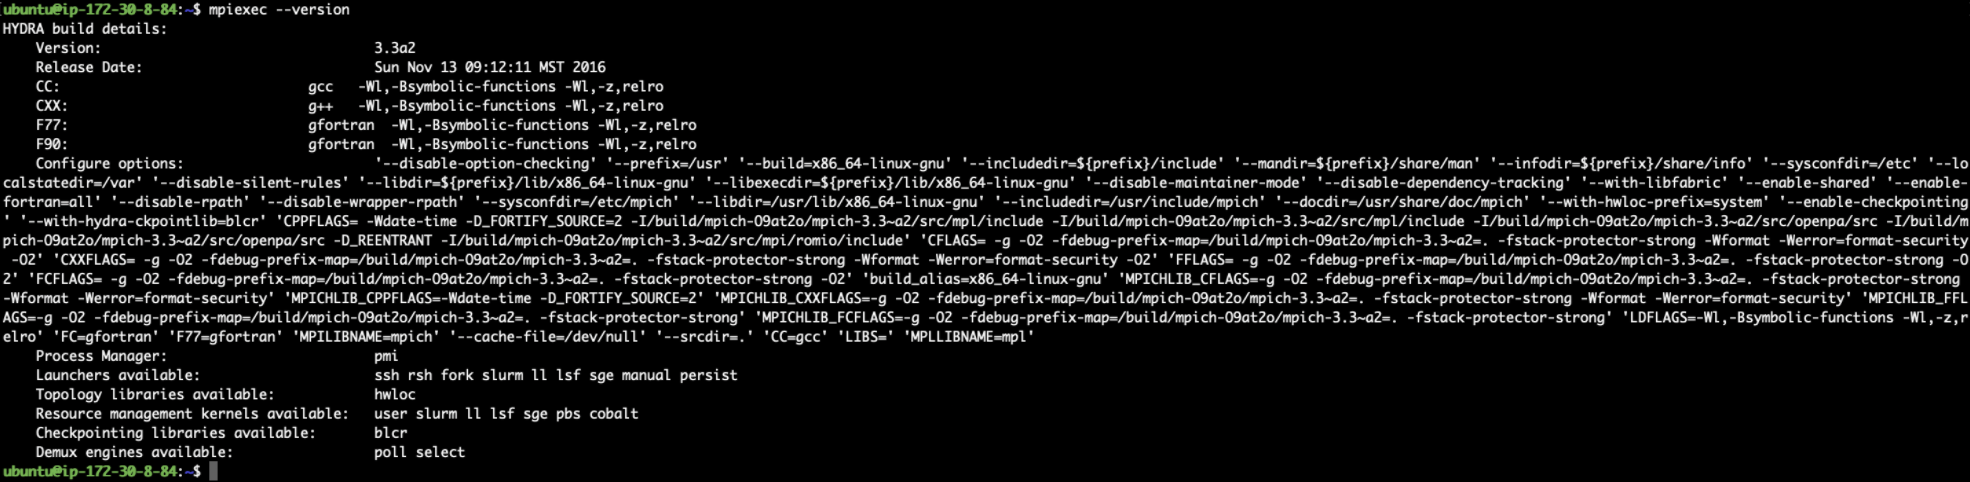 

* CPU Info:
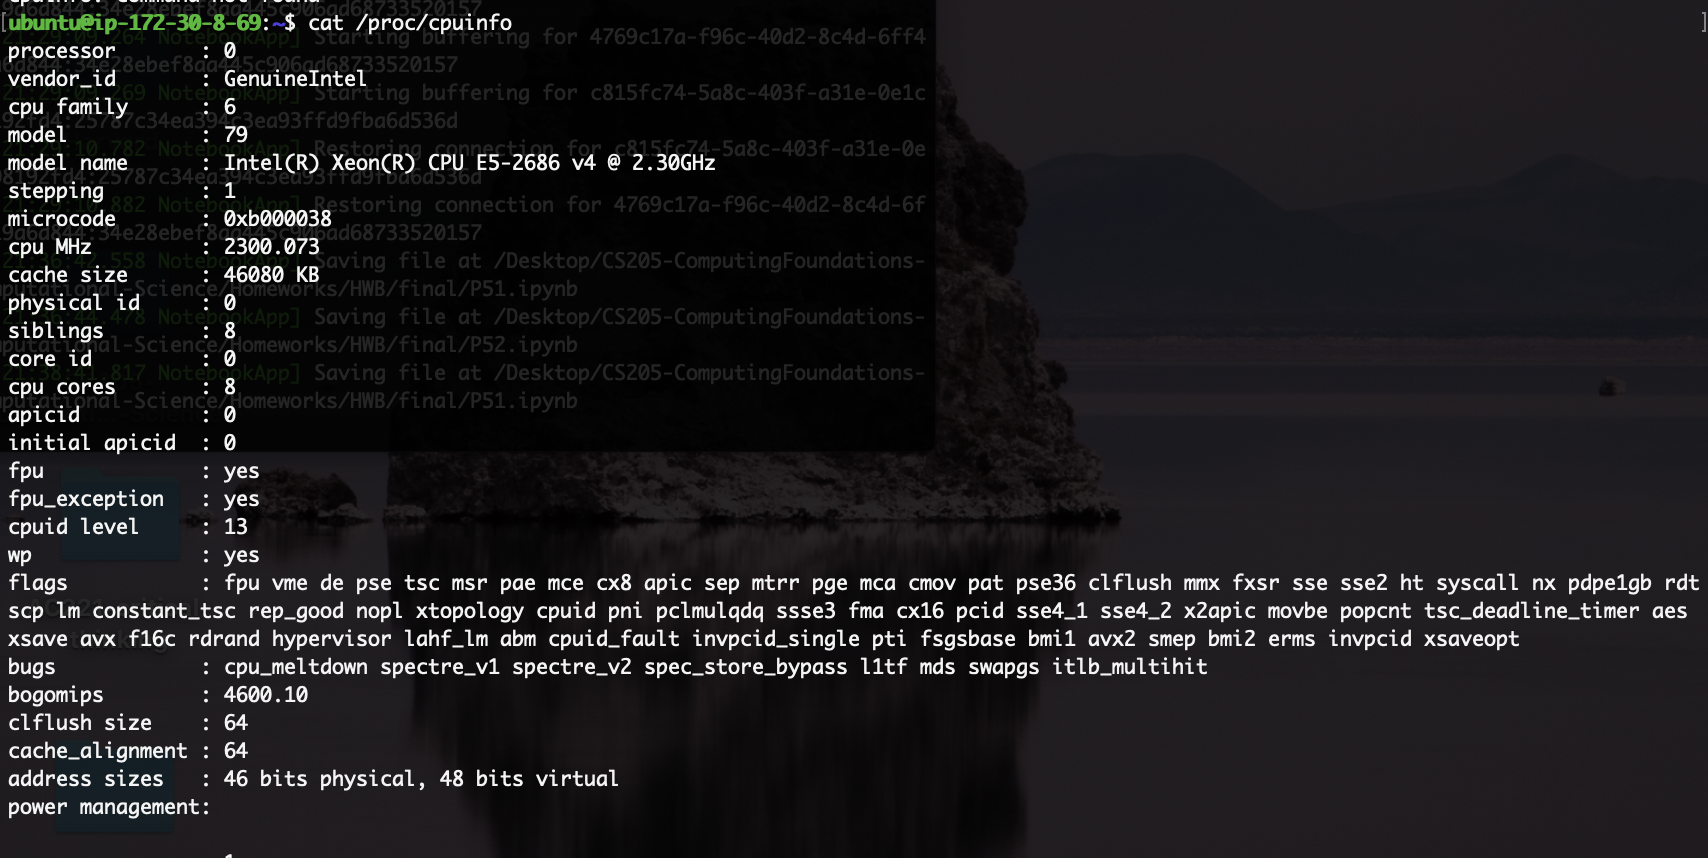
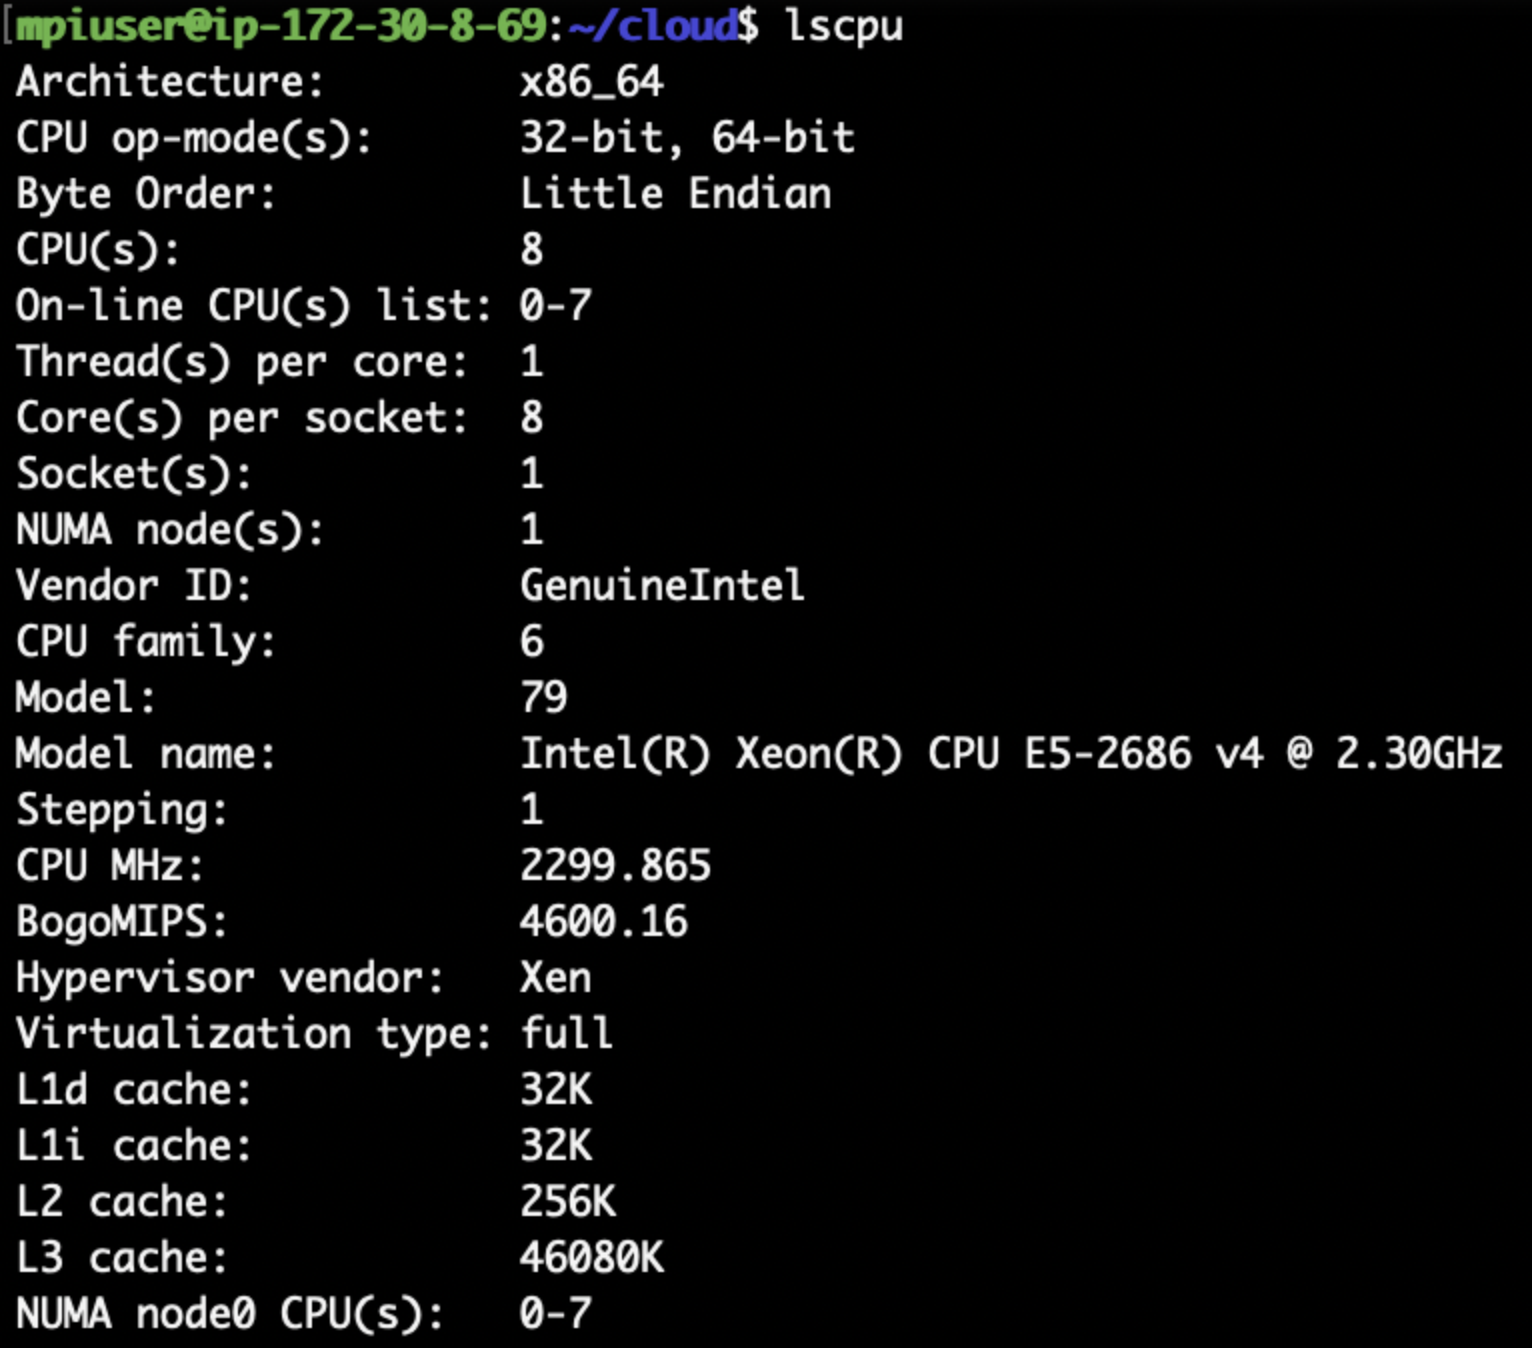

* Compiler:
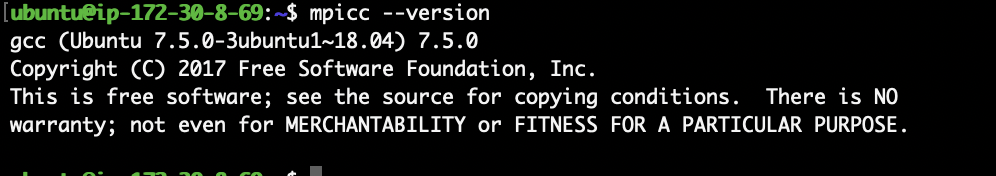

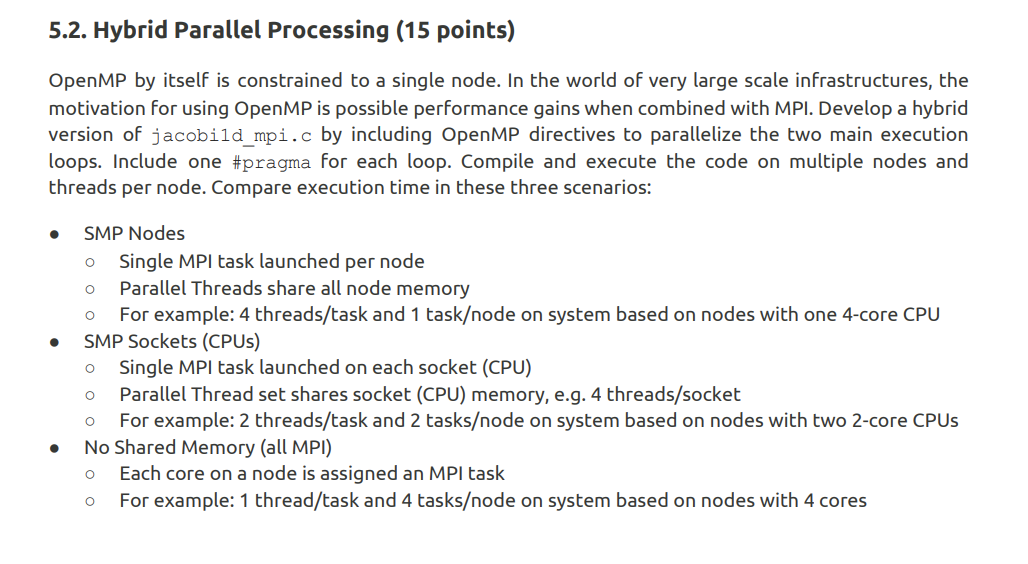
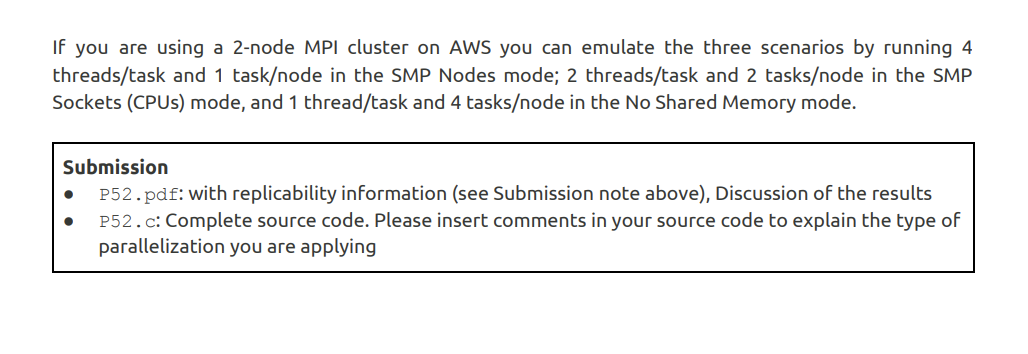

**5.2** Table for Different Hybrid Mode in elapsed execution time

With `ncells = 10^8`, `step=100`, `2 nodes` from previous question.

*Unit: Seconds*
 
| Hybrid Mode   |SMP Nodes *(4 threads/task and 1 task/node)* | SMP Sockets *(2 threads/task and 2 tasks/node)* | No Shared Memory *(1 thread/task and 4 tasks/node)*|
| -----------| ----------- |----------- |----------- |
| Elapsed Time|6.60708|6.56121 |6.55368|

> Result shows similar elapsed time for three hybrid models. I think they could all approximately and theoritically achieve `8x` speedup. As we know from 5.1.3, the sequential runtime is fluctuating around `48 seconds` for two nodes distributed memory parallel processing. Here the elapsed time for three modes are all around `6 seconds`, approximately reach `8 x` speedup.

> It makes sense because for SMP node: it has $4*1*2 = 8$ threads running concurrently;
  For SMP sockets, it has $2*2*2=8$; and similarly for no shared memory, it has $1*4*2=8$ threads. 
  
> However, there is a slightly better performance for **No Shared Memory**, because it has 1 thread/task, no two threads will share same memory and thus it will incur less communication and waiting overhead. It takes the least elapsed time among three. 

> Generally, here for three different hybrid models, no matter how we combine shared-memory within and distributed-memory across nodes, whether it's Single MPI task launched per node, Single MPI task launched on each socket, Each core on a node assigned an MPI task, they all parallelize the two main for loops into 8 sub threads. Their result is relatively the same. The hybrid model start with MPI initialization first, and then create OMP parallel regions within MPI task/processes. It then call MPI library from serial region or a single thread within parallel region. Just these 8 tasks are in different place, maybe in shared memory, or in distributed memory across node. Thus, the theoritical speedup should all be around `48/6 = 8`. Plus there is as there are only 8 threads, allocated to two nodes, there'no thread meets overhead threshold for communication and sychronization, thus all three hybrid types are close to theory value.

## References:

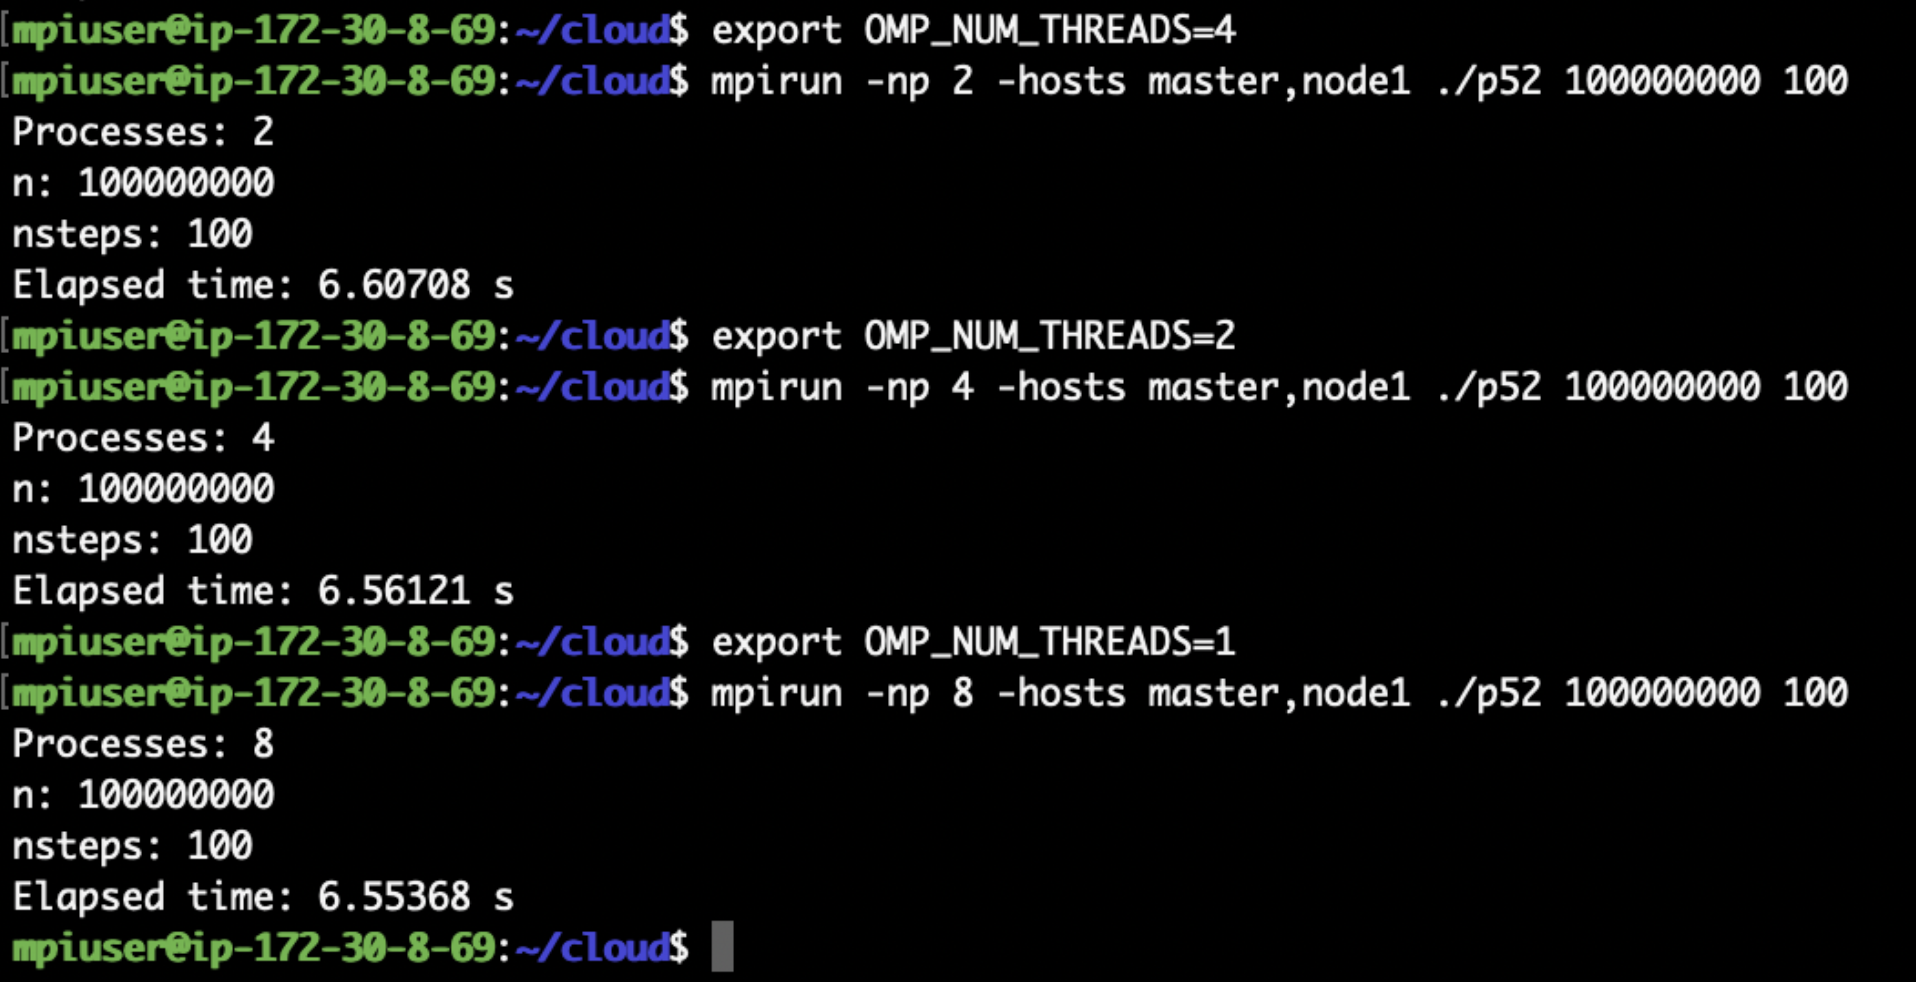

--- old version ----

with `-np` flag wrong (it should be total processes in two nodes, thus should times 2)

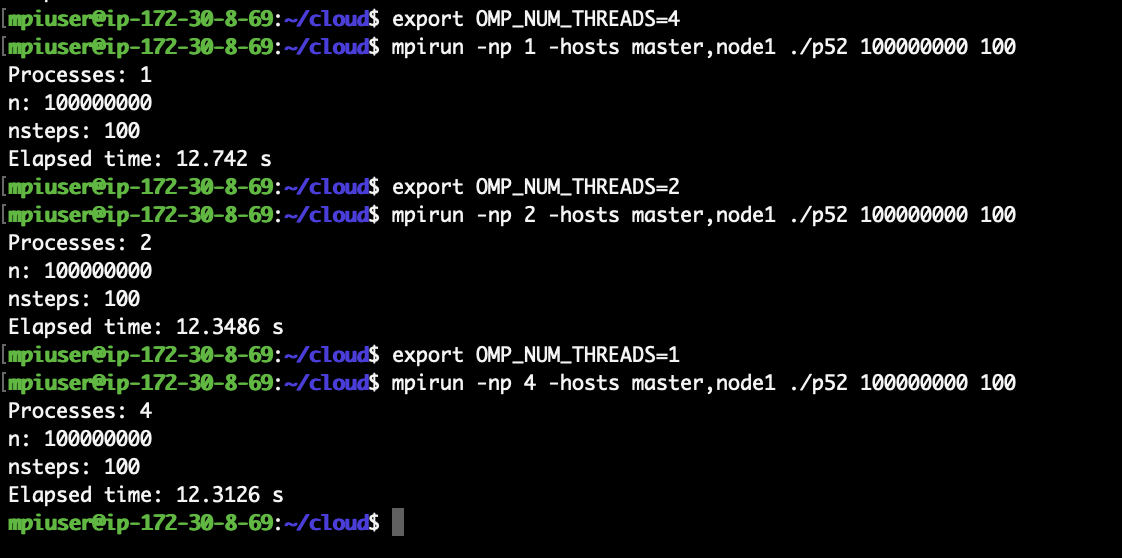